<a href="https://colab.research.google.com/github/akashgond3112/practice_Recommendation_Engine/blob/main/item_based_collaborative_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# readig data from https://grouplens.org/datasets/movielens/
my_df = pd.read_csv('/content/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

# checking data
my_df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
# Read the movie titles file
movie_titles = pd.read_csv('/content/u.item', sep='|', encoding='latin-1', header=None, usecols=[0, 1], names=['item_id', 'movie_title'])

# Merge the movie titles into my_df
my_df = pd.merge(my_df, movie_titles, on='item_id')

# Check the updated dataframe
my_df.head()

,user_id,item_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [4]:
my_df.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [6]:
#creating mean rating data
ratings = pd.DataFrame(my_df.groupby('movie_title')['rating'].mean())
ratings.head()

,rating
movie_title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [7]:
# Add a column for the number of ratings
ratings['number_of_ratings'] = my_df.groupby('movie_title')['rating'].count()

# Display the movie titles, their average rating, and the number of ratings
print(ratings.head())

                             rating  number_of_ratings
movie_title                                           
'Til There Was You (1997)  2.333333                  9
1-900 (1994)               2.600000                  5
101 Dalmatians (1996)      2.908257                109
12 Angry Men (1957)        4.344000                125
187 (1997)                 3.024390                 41


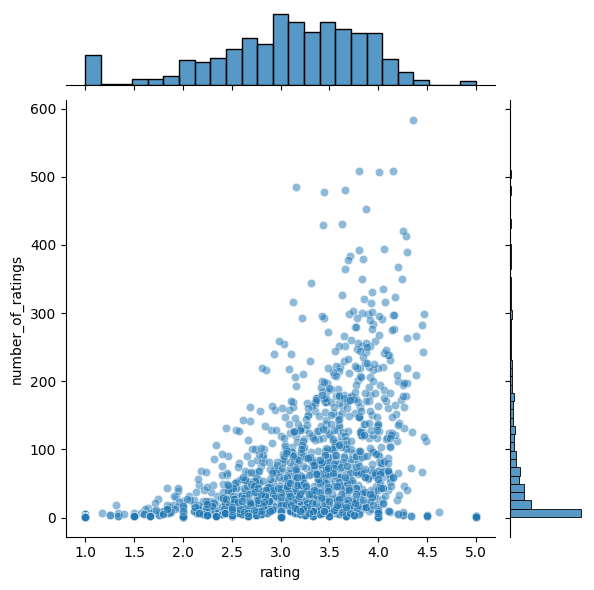

In [8]:
# prompt: plotting the join plot

import matplotlib.pyplot as plt
import seaborn as sns

# Create the jointplot
sns.jointplot(x='rating', y='number_of_ratings', data=ratings, alpha=0.5)
plt.show()

In [9]:
# prompt: create user item interaction matrix

# Create user-item interaction matrix
user_item_matrix = my_df.pivot_table(index='user_id', columns='movie_title', values='rating')

# Print the matrix (optional, for a preview)
print(user_item_matrix.head())

movie_title  'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                       
1                                  NaN           NaN                    2.0   
2                                  NaN           NaN                    NaN   
3                                  NaN           NaN                    NaN   
4                                  NaN           NaN                    NaN   
5                                  NaN           NaN                    2.0   

movie_title  12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                     
1                            5.0         NaN                          NaN   
2                            NaN         NaN                          NaN   
3                            NaN         2.0                          NaN   
4                            NaN         NaN                 

In [10]:
# prompt: most rated movies

# Assuming 'ratings' DataFrame from the previous code is available

# Sort the ratings DataFrame by the number of ratings in descending order
most_rated_movies = ratings.sort_values('number_of_ratings', ascending=False)

# Display the top N most rated movies (e.g., top 10)
print(most_rated_movies.head(10))

                                 rating  number_of_ratings
movie_title                                               
Star Wars (1977)               4.358491                583
Contact (1997)                 3.803536                509
Fargo (1996)                   4.155512                508
Return of the Jedi (1983)      4.007890                507
Liar Liar (1997)               3.156701                485
English Patient, The (1996)    3.656965                481
Scream (1996)                  3.441423                478
Toy Story (1995)               3.878319                452
Air Force One (1997)           3.631090                431
Independence Day (ID4) (1996)  3.438228                429


In [11]:
# Assuming 'user_item_matrix' DataFrame from the previous code is available

# Get the rating for the movie "Fargo"
fargo_rating = user_item_matrix['Fargo (1996)']

# Print the rating (which will be a Pandas Series of user ratings)
print(fargo_rating)


user_id
1      5.0
2      5.0
3      NaN
4      NaN
5      5.0
      ... 
939    NaN
940    3.0
941    NaN
942    NaN
943    5.0
Name: Fargo (1996), Length: 943, dtype: float64


In [12]:
#finding the correlation with different movies
similar_to_fargo = user_item_matrix.corrwith(fargo_rating)

In [13]:
#observing the result
similar_to_fargo.head()

,0
movie_title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


# Creating Thresold for minimum number of ratings

In [14]:
#creating dataframe to bring in of ratings
corr_fargo = pd.DataFrame(similar_to_fargo, columns=['Correlation'])
corr_fargo.dropna(inplace=True)
corr_fargo.head()

,Correlation
movie_title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


In [15]:
#Bringing in ratings
corr_fargo = corr_fargo.join(ratings['number_of_ratings'])
corr_fargo.head()

,Correlation,number_of_ratings
movie_title,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41


In [18]:
corr_fargo[corr_fargo['number_of_ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,number_of_ratings
movie_title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173
